#### 이동 평균과 이동 표준 편차를 사용한 이상치 탐지

1. 데이터의 이동 평균과 이동 표준편차를 계산함
2. 데이터 포인트가 이동 평균과 일정한 거리 이상 떨어져 있는지 확인
3. 이상치는 이동 평균과 일정한 거리 이상 떨어져 있다

- 이동 평균 계상 : 데이터 포인트 이전 N개의 포인트 평균 = 데이터 전반적인 추세 파악
- 이동 표준편차 계산 : 데이터 이전 N개의 포인트 표준편차 = 데이터의 변동성 파악

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. 데이터 생성

In [3]:
pd.set_option('display.max_rows',500)   # 데이터 한계 설정

# 시계열 데이터 생성
dates = pd.date_range('2023-01-01', periods=500, freq='d')
values = np.random.randn(500)

# 데이터 프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#### 2. 이동 평균과 이동 표준편차 계산

In [4]:
# 7일 주기로 이동 평균과 이동 표준편차 구하는 설정
window_size = 7
data['MovingAverage'] = data['Value'].rolling(window=window_size).mean()    # rolling : 이동 / 이동한 다음 평균 구하기
data['MovingStd'] = data['Value'].rolling(window=window_size).std()
print(data['MovingAverage'])
print(data['MovingStd'])

'''
윈도우 크기를 선택하는 것은 데이터 특성과 분석 목적에 따라 달라짐.
더 짧은 데이터 주기로 설정하면 노이즈에 민감해 질 수 있다.
더 긴 데이터 주기로 설정하면 신속한 변화를 놓칠 수 있다.
'''

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      0.148567
7      0.092244
8     -0.081500
9      0.037286
10     0.174958
11     0.328296
12     0.119421
13    -0.053657
14     0.465652
15     0.092240
16     0.229761
17     0.357159
18     0.220960
19     0.026815
20     0.173173
21    -0.119882
22    -0.079038
23    -0.415074
24    -0.478277
25    -0.654772
26    -0.570334
27    -0.510098
28    -0.593640
29    -0.217364
30    -0.209330
31    -0.276471
32    -0.462570
33    -0.557797
34    -0.611367
35    -0.581578
36    -0.352675
37    -0.196967
38    -0.419834
39    -0.231822
40    -0.019832
41    -0.007711
42     0.164736
43    -0.249615
44    -0.529429
45    -0.459234
46    -0.300408
47    -0.177662
48     0.139317
49    -0.032871
50     0.130509
51     0.444834
52     0.574878
53     0.462165
54     0.179461
55    -0.298706
56    -0.208415
57    -0.199802
58    -0.310173
59    -0.457912
60    -0.511278
61    -0.283654
62    -0

#### 3. 임계값 설정, 이상치 탐지

In [8]:
threashold_multiplier = 2 # 임계값 계수 = 이상치로 간주되는 값의 범위를 조절하는 역할
data['Threashold'] = data['MovingAverage'] + threashold_multiplier * data['MovingStd']

# print(data['Threashold'])

# 이상치 탐지 = 임계값을 초과 하는 경우는 True(이상치)로 설정
data['Outlier'] = data['Value'] > data['Threashold']
print(data['Outlier'])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

#### 4. 시각화

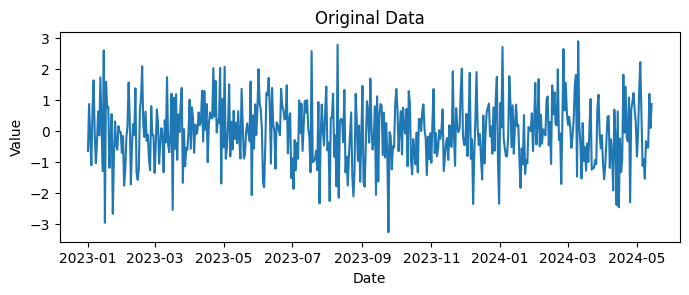

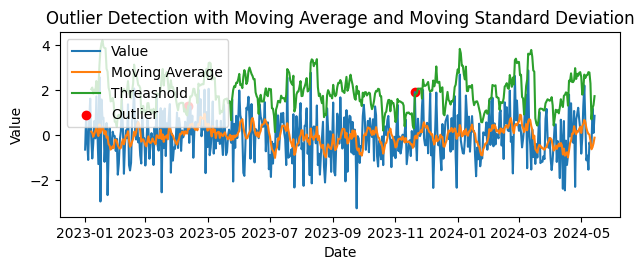

In [24]:
# 시계열 데이터 시각화
plt.figure(figsize=(8, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data')
plt.show()

# 이동 평균, 이동 표준편차, 임계값, 이상치 그래프
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Value'], label='Value')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.plot(data['Date'], data['Threashold'], label='Threashold')
plt.scatter(data[data['Outlier']]['Date'], data[data['Outlier']]['Value'], color='red', label='Outlier')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Moving Average and Moving Standard Deviation')
plt.legend()

plt.tight_layout()

- 파란색 : 오리지널
- 주황색 : 이동 평균 - 원본 데이터의 평균을 완화 = 부드러운 곡선
- 초록색 : 임계값 그래프 - 이동 평균 내 임계값을 곱한 것 = 이상치를 탐지하기 위한 기준 값
- 빨간색 : 이동 평균과 임계값이 만나는 지점 = 이상치